In [38]:
from option import Option

# Example usage:
S0 = 100  # Initial stock price
K = 110 # Strike
T = 1   # Number of years
vol = 0.2 # Volatility
r = 0.05  # Risk-free rate (5%)
n = 8 # Number of periods (levels) in tree

In [40]:
put = Option(S0, K, T, vol, r, n, option_type='put')

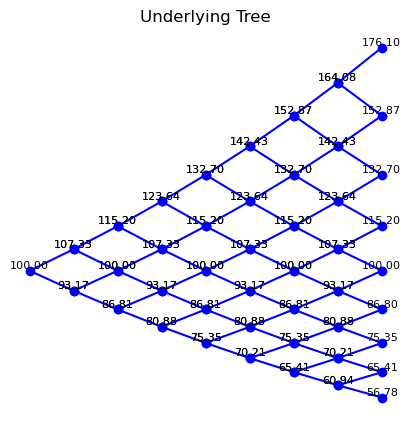

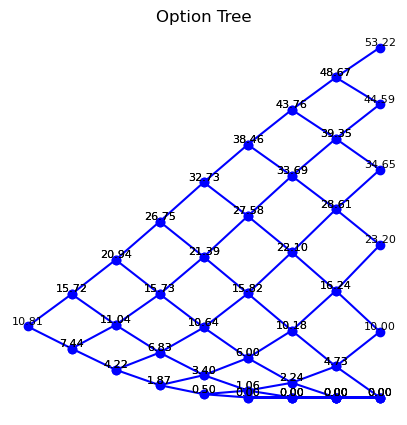

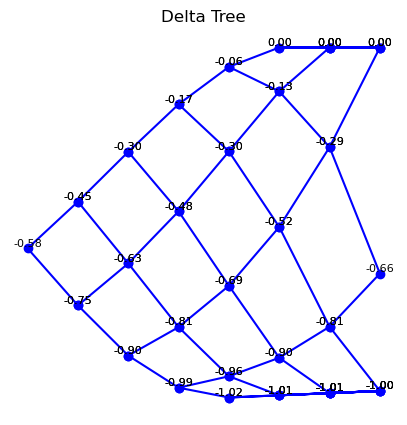

In [42]:
put.plot_tree('underlying')
put.plot_tree('option')
put.plot_tree('delta')

In [43]:
call = Option(52, 50, 0.25, 0.2, 0.05, 8)

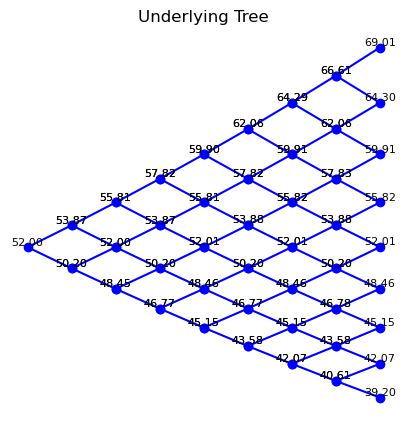

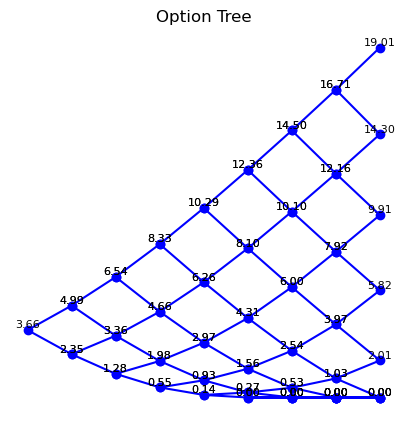

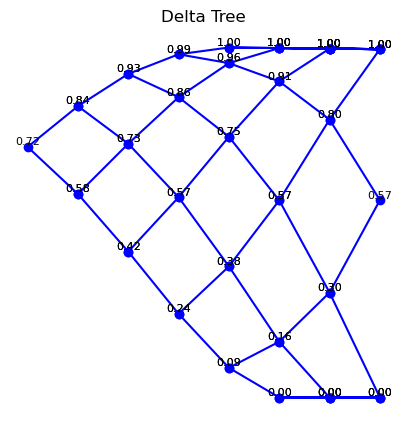

In [44]:
call.plot_tree('underlying')
call.plot_tree('option')
call.plot_tree('delta')